In [86]:
import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import nbformat



In [87]:
df = pd.read_csv('C:\\Users\\12028\\Python\\CSV\\car_data.csv')
df.head()

,body_type,bought_condition,car_id,city,color,condition,engine_size,fuel_type,make,mileage,model,price,registered_city,selling_condition,transmission,year_of_manufacture
0,NaN,Imported,jEY4wdZCrZRlz3VMMSP5ORrkVRUdhxP,Ajah,Red,Nigerian Used,2400.0,Petrol,Hyundai,101070,Sonata,15187500,Lagos,Registered,Automatic,2017
1,NaN,Registered,jEY4wdZIM55Yjiv7XraO7Z3lk15Z9Of,Ikeja,Silver,Nigerian Used,1800.0,Petrol,Toyota,332348,Corolla,5062500,NaN,Registered,Automatic,2004
2,SUV,Registered,jEY4wdZFuW8Ip9xU2rQcvTUHjNAuNtn,Yaba,Black,Nigerian Used,3500.0,Petrol,Acura,254710,MDX,3712500,LAGOS,Registered,Automatic,2003
3,Crossover,Registered,jEY4wdZBMUd8h0pfZdoO9iMHz59dpP4,Ojodu,Silver,Nigerian Used,3500.0,Petrol,Toyota,304934,Venza,13500000,LAGOS,Registered,Automatic,2011
4,NaN,Registered,jEY4wdZRUW39MgXqSzdqdxZPyNbvcLJ,Asokoro,Gray,Nigerian Used,3300.0,Petrol,Toyota,155439,Sienna,7312500,NaN,Registered,Automatic,2006


In [88]:
df.drop(columns=['bought_condition'], inplace=True)

In [89]:
df.describe()

,engine_size,mileage,price,year_of_manufacture
count,1762.000000,1.801000e+03,1.801000e+03,1801.000000
mean,2964.841657,2.911995e+05,1.072434e+07,2008.894503
std,2101.636908,3.791208e+06,1.746354e+07,4.928599
min,35.000000,1.000000e+00,1.125000e+06,1992.000000
25%,2000.000000,1.184480e+05,3.990000e+06,2005.000000
50%,3000.000000,1.814530e+05,6.195000e+06,2008.000000
75%,3500.000000,2.504860e+05,1.144000e+07,2012.000000
max,63000.000000,1.609340e+08,4.725000e+08,2024.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   body_type            838 non-null    object 
 1   car_id               1801 non-null   object 
 2   city                 1801 non-null   object 
 3   color                1801 non-null   object 
 4   condition            1801 non-null   object 
 5   engine_size          1762 non-null   float64
 6   fuel_type            1801 non-null   object 
 7   make                 1801 non-null   object 
 8   mileage              1801 non-null   int64  
 9   model                1801 non-null   object 
 10  price                1801 non-null   int64  
 11  registered_city      1007 non-null   object 
 12  selling_condition    1800 non-null   object 
 13  transmission         1801 non-null   object 
 14  year_of_manufacture  1801 non-null   int64  
dtypes: float64(1), int64(3), object(11)
me

In [91]:
df['currency'] = 'NGN' 

In [92]:
df[df.isnull()].count()

body_type              0
car_id                 0
city                   0
color                  0
condition              0
engine_size            0
fuel_type              0
make                   0
mileage                0
model                  0
price                  0
registered_city        0
selling_condition      0
transmission           0
year_of_manufacture    0
currency               0
dtype: int64

In [93]:
df[df.duplicated()].count()

body_type              0
car_id                 0
city                   0
color                  0
condition              0
engine_size            0
fuel_type              0
make                   0
mileage                0
model                  0
price                  0
registered_city        0
selling_condition      0
transmission           0
year_of_manufacture    0
currency               0
dtype: int64

In [94]:
df[df.isna()].count()

body_type              0
car_id                 0
city                   0
color                  0
condition              0
engine_size            0
fuel_type              0
make                   0
mileage                0
model                  0
price                  0
registered_city        0
selling_condition      0
transmission           0
year_of_manufacture    0
currency               0
dtype: int64

In [95]:
most_expensive_car = df.loc[df['price'].idxmax()]
print("The most expensive car is:")
print(most_expensive_car)

The most expensive car is:
body_type                                          SUV
car_id                 jEY4wdZxthv65oSSJIYlLWSiCQzmswD
city                                             Ikoyi
color                                            White
condition                                 Foreign Used
engine_size                                     4000.0
fuel_type                                       Petrol
make                                     Mercedes-Benz
mileage                                            376
model                                          G-Class
price                                        472500000
registered_city                                    NaN
selling_condition                             Imported
transmission                                 Automatic
year_of_manufacture                               2021
currency                                           NGN
Name: 67, dtype: object


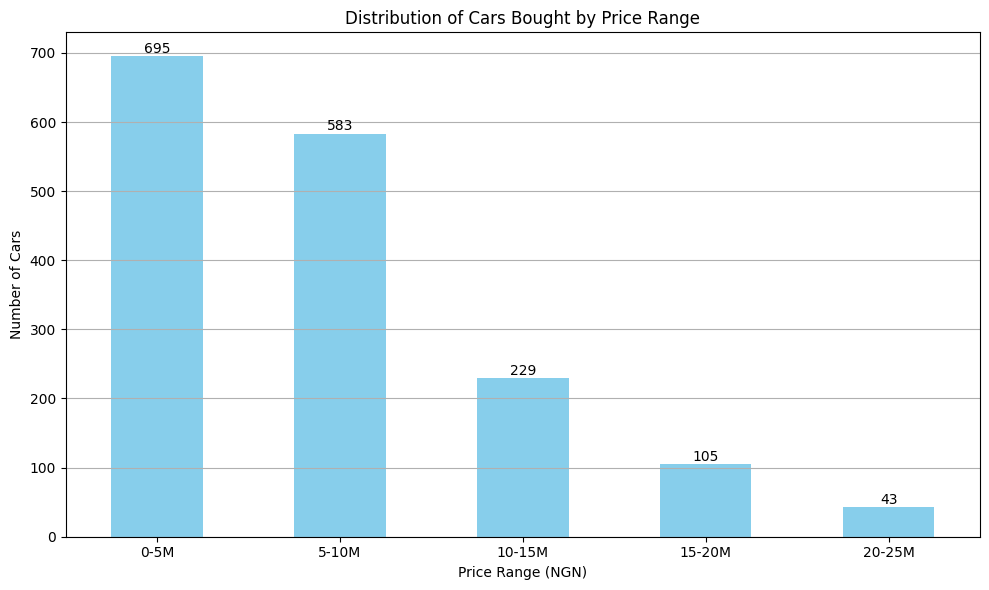

In [96]:
# Binning car prices into increments of 500,000 NGN
bins = [0, 5000000, 10000000, 15000000, 20000000, 25000000]  # Adjust as needed
labels = ['0-5M', '5-10M', '10-15M', '15-20M', '20-25M']  # Adjust labels accordingly
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Counting cars in each price range
counts = df['price_range'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars Bought by Price Range')
plt.xlabel('Price Range (NGN)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels to the bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

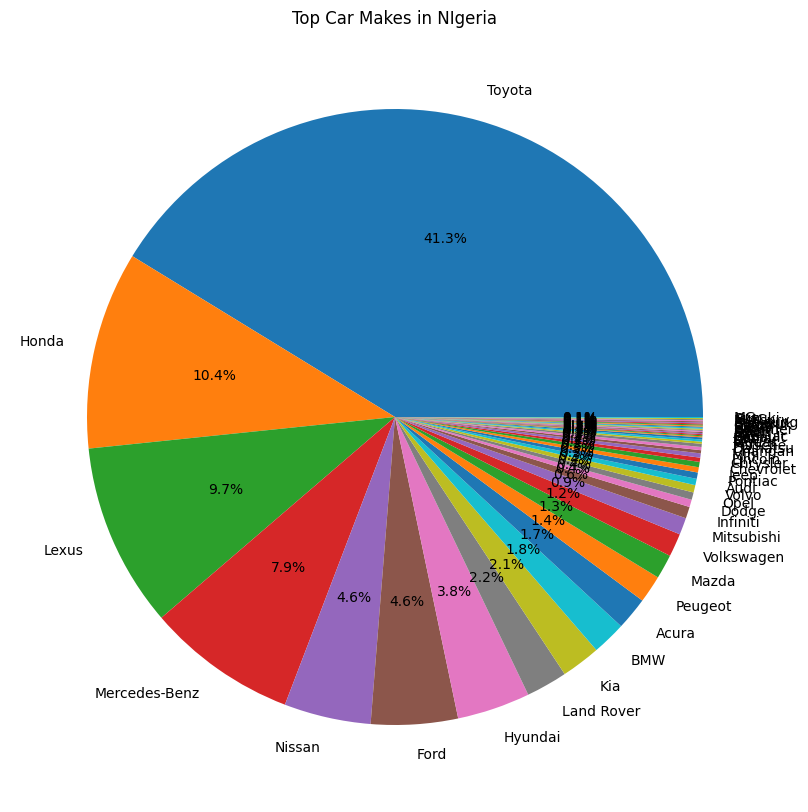

In [98]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.make.value_counts().plot(ax=ax, kind='pie',autopct='%1.1f%%')
ax.set_ylabel("")
ax.set_title("Top Car Makes in NIgeria")
plt.show()

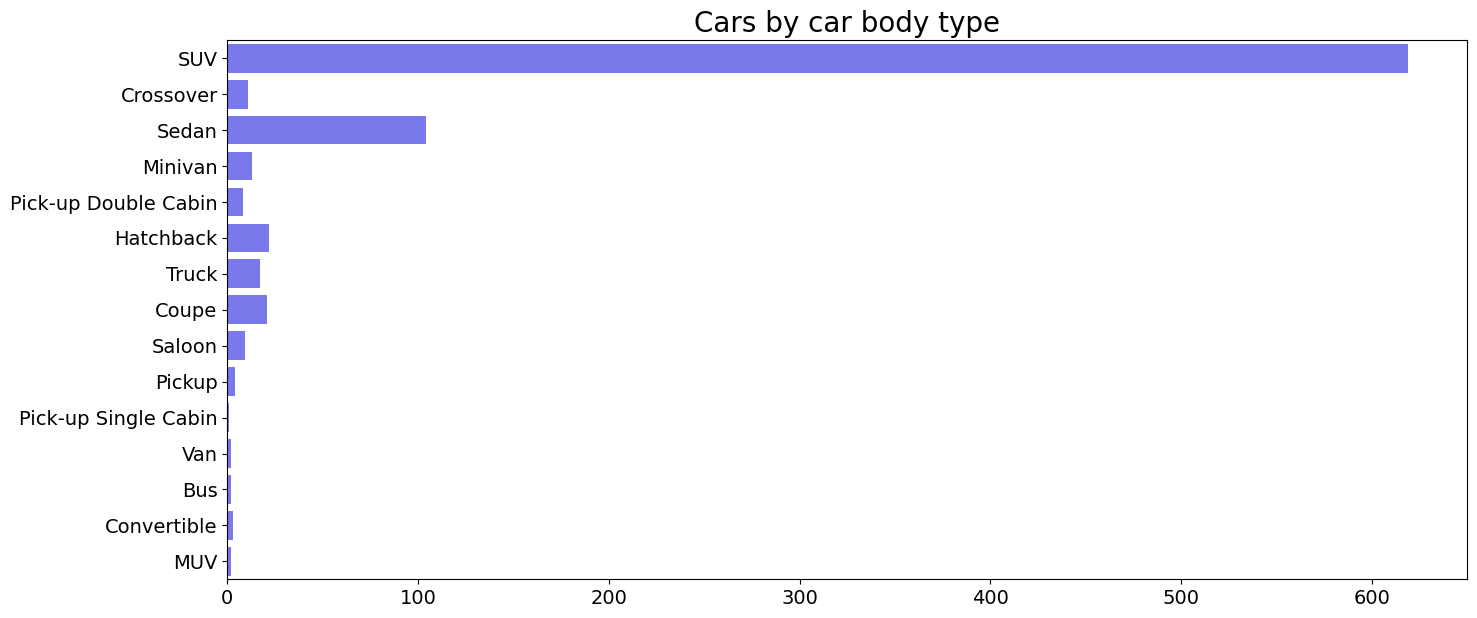

In [99]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

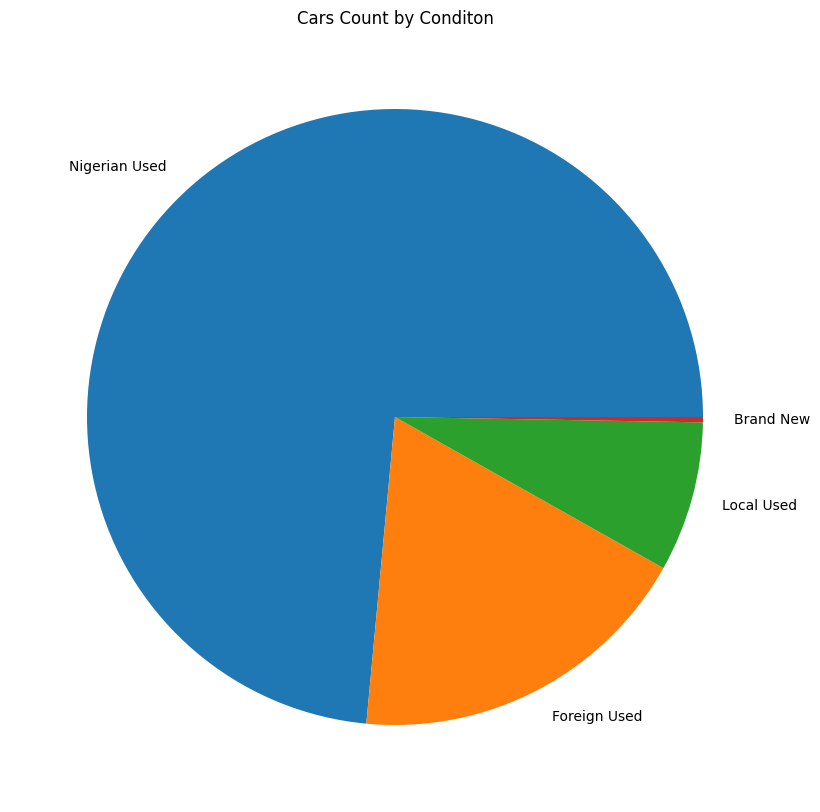

In [100]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.condition.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Conditon")
plt.show()

In [107]:
# Binning car prices into predefined ranges
bins = [0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 50000000]
labels = ['0-5M', '5-10M', '10-15M', '15-20M', '20-25M', '25-30M', '30-35M', '35-40M', '40-50M']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Creating a scatter plot using Plotly
fig = px.scatter(df, x='make', y='condition', color='price_range',
                 title='Car Make and Condition Analysis by Price Range',
                 hover_data=['make', 'condition', 'price','model'],
                 category_orders={'condition': ['Excellent', 'Good', 'Fair']},
                 labels={'make': 'Car Make', 'condition': 'Condition'})

# Customize layout
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(marker=dict(size=12, opacity=0.8))

# Show top 10 and bottom 10 makes by condition
top_10 = df.groupby('make')['price'].value_counts().unstack().fillna(0).sum(axis=1).nlargest(10).index
bottom_10 = df.groupby('make')['price'].value_counts().unstack().fillna(0).sum(axis=1).nsmallest(10).index

top_bottom_10 = pd.concat([df[df['make'].isin(top_10)], df[df['make'].isin(bottom_10)]])

fig.show()